# Covid-19 Vaccinations and Uemployment Rates Relationship Analysis

# Project Overview

## Context and Background
The Covid-19 pandemic has wreaked havoc on the lives of people across the globe and forever altered the economic activities of the world. With over a million of lives lost to the Covid-19 virus so far and the continuous increasing rate of infections, the battle to return to what was once considered normalcy is far from over. The economic impact from the pandemic is nearly at a point-of-no-return- as a lot of businesses permanently shut down and many jobs were lost. The road to recovery will be steep and arduous as the target of vaccinating as many people as possible within the constrained time and resources will determine the speed to go back to the 'normal' times.

Despite of all negative effects imposed upon people's lives by the Covid-19 virus, there's truly a light at the end of the tunnel for societies to bounce back and come out stronger. By properly capitalizing  on all availabe avenues to defeat the roaring and expansive virus, societies will emerge victorious when actions are taken to use the various tools at their disposal. One such tool is the advanced technology that we take for granted- internet, smartphones, and social media platforms. Today, the speed at which information travels is no longer an issue. For example, a piece of information can go 'viral' instantly on social media platforms like Facebook and Twitter and can garner millions of views in a very short time- like hours if not less.

To try to end the spread of this virus, public health officials, government agencies, and private sectors can tap into the well of abundance called 'big data' to educate the public about the proper steps to curb the spread of the Covid-19 virus. Since the amounts of data generated in this device-flooded era are so large to manage and use them with traditional data analysis tools, massive investments are required to extract insightful knowledge. By using the digital information tools, healthcare providers can disseminate the necessary information and services to the public at rapid speed. But proper analytical tools are needed to separate facts from fictions especially when people's lives are at risk.

In order to dispel misinformation about the vaccines, policymakers should be equipped with the right tools to inform the suspecting public about the importance and benefits of the covid-19 vaccines. Tremendous efforts must be undertaken to vaccinate the whole population so that the virus would come under control. But a very crucial factor that can be incorporated into the public awareness messages is the economic benefit of the vaccinations. Correlating the vaccinations and positive uptick in employment is a convincing way of getting more people vaccinated in a timely manner. Requiring employees to be fully vaccinated prior to returning to work is a way to curb the spread of the virus at work and elsewhere.

The goal of this project is to use publicly available datasets to predict a positive employment rate when more people are vaccinated. The project will use the machine learning model for predicting the outcome. Several steps will be employed to make sure no significant errors influence our prediction. The correct methodology will be used to conduct the data analysis processes. The sources of our datasets are properly vetted as to avoid biases and incomplete data.


##  Research Question or Organizational Need
Is there a correlation between the number of vaccinated people and a decrease in an unemployment rate?

Knowing the relationship between the vaccinations and unemployment rates, officials across the country can implement policies that can facilitate the public acceptance of vaccinations and drive down vaccine hesitancy rates and therefore control the spread of covid-19 virus and pave the way for the resurgence of economic activities.

The purpose of this research is to correlate the increase in vaccination rates with an increase in employment rates in the United States. Through mass vaccinations, the road to recovery will be speedy and economic situation of the country will improve.


### Data Dictionary
In order to drive useful insights from the datasets, understanding the contexts and contents of the datasets is a required step. The data dictionary is provided below to describe what the features in the dataset represent.

The table below describes the various variables in the Covid-19 vaccinations dataset.


<!-- <div>          
<img src='attachment:image.png' width='6800' />
</div> -->


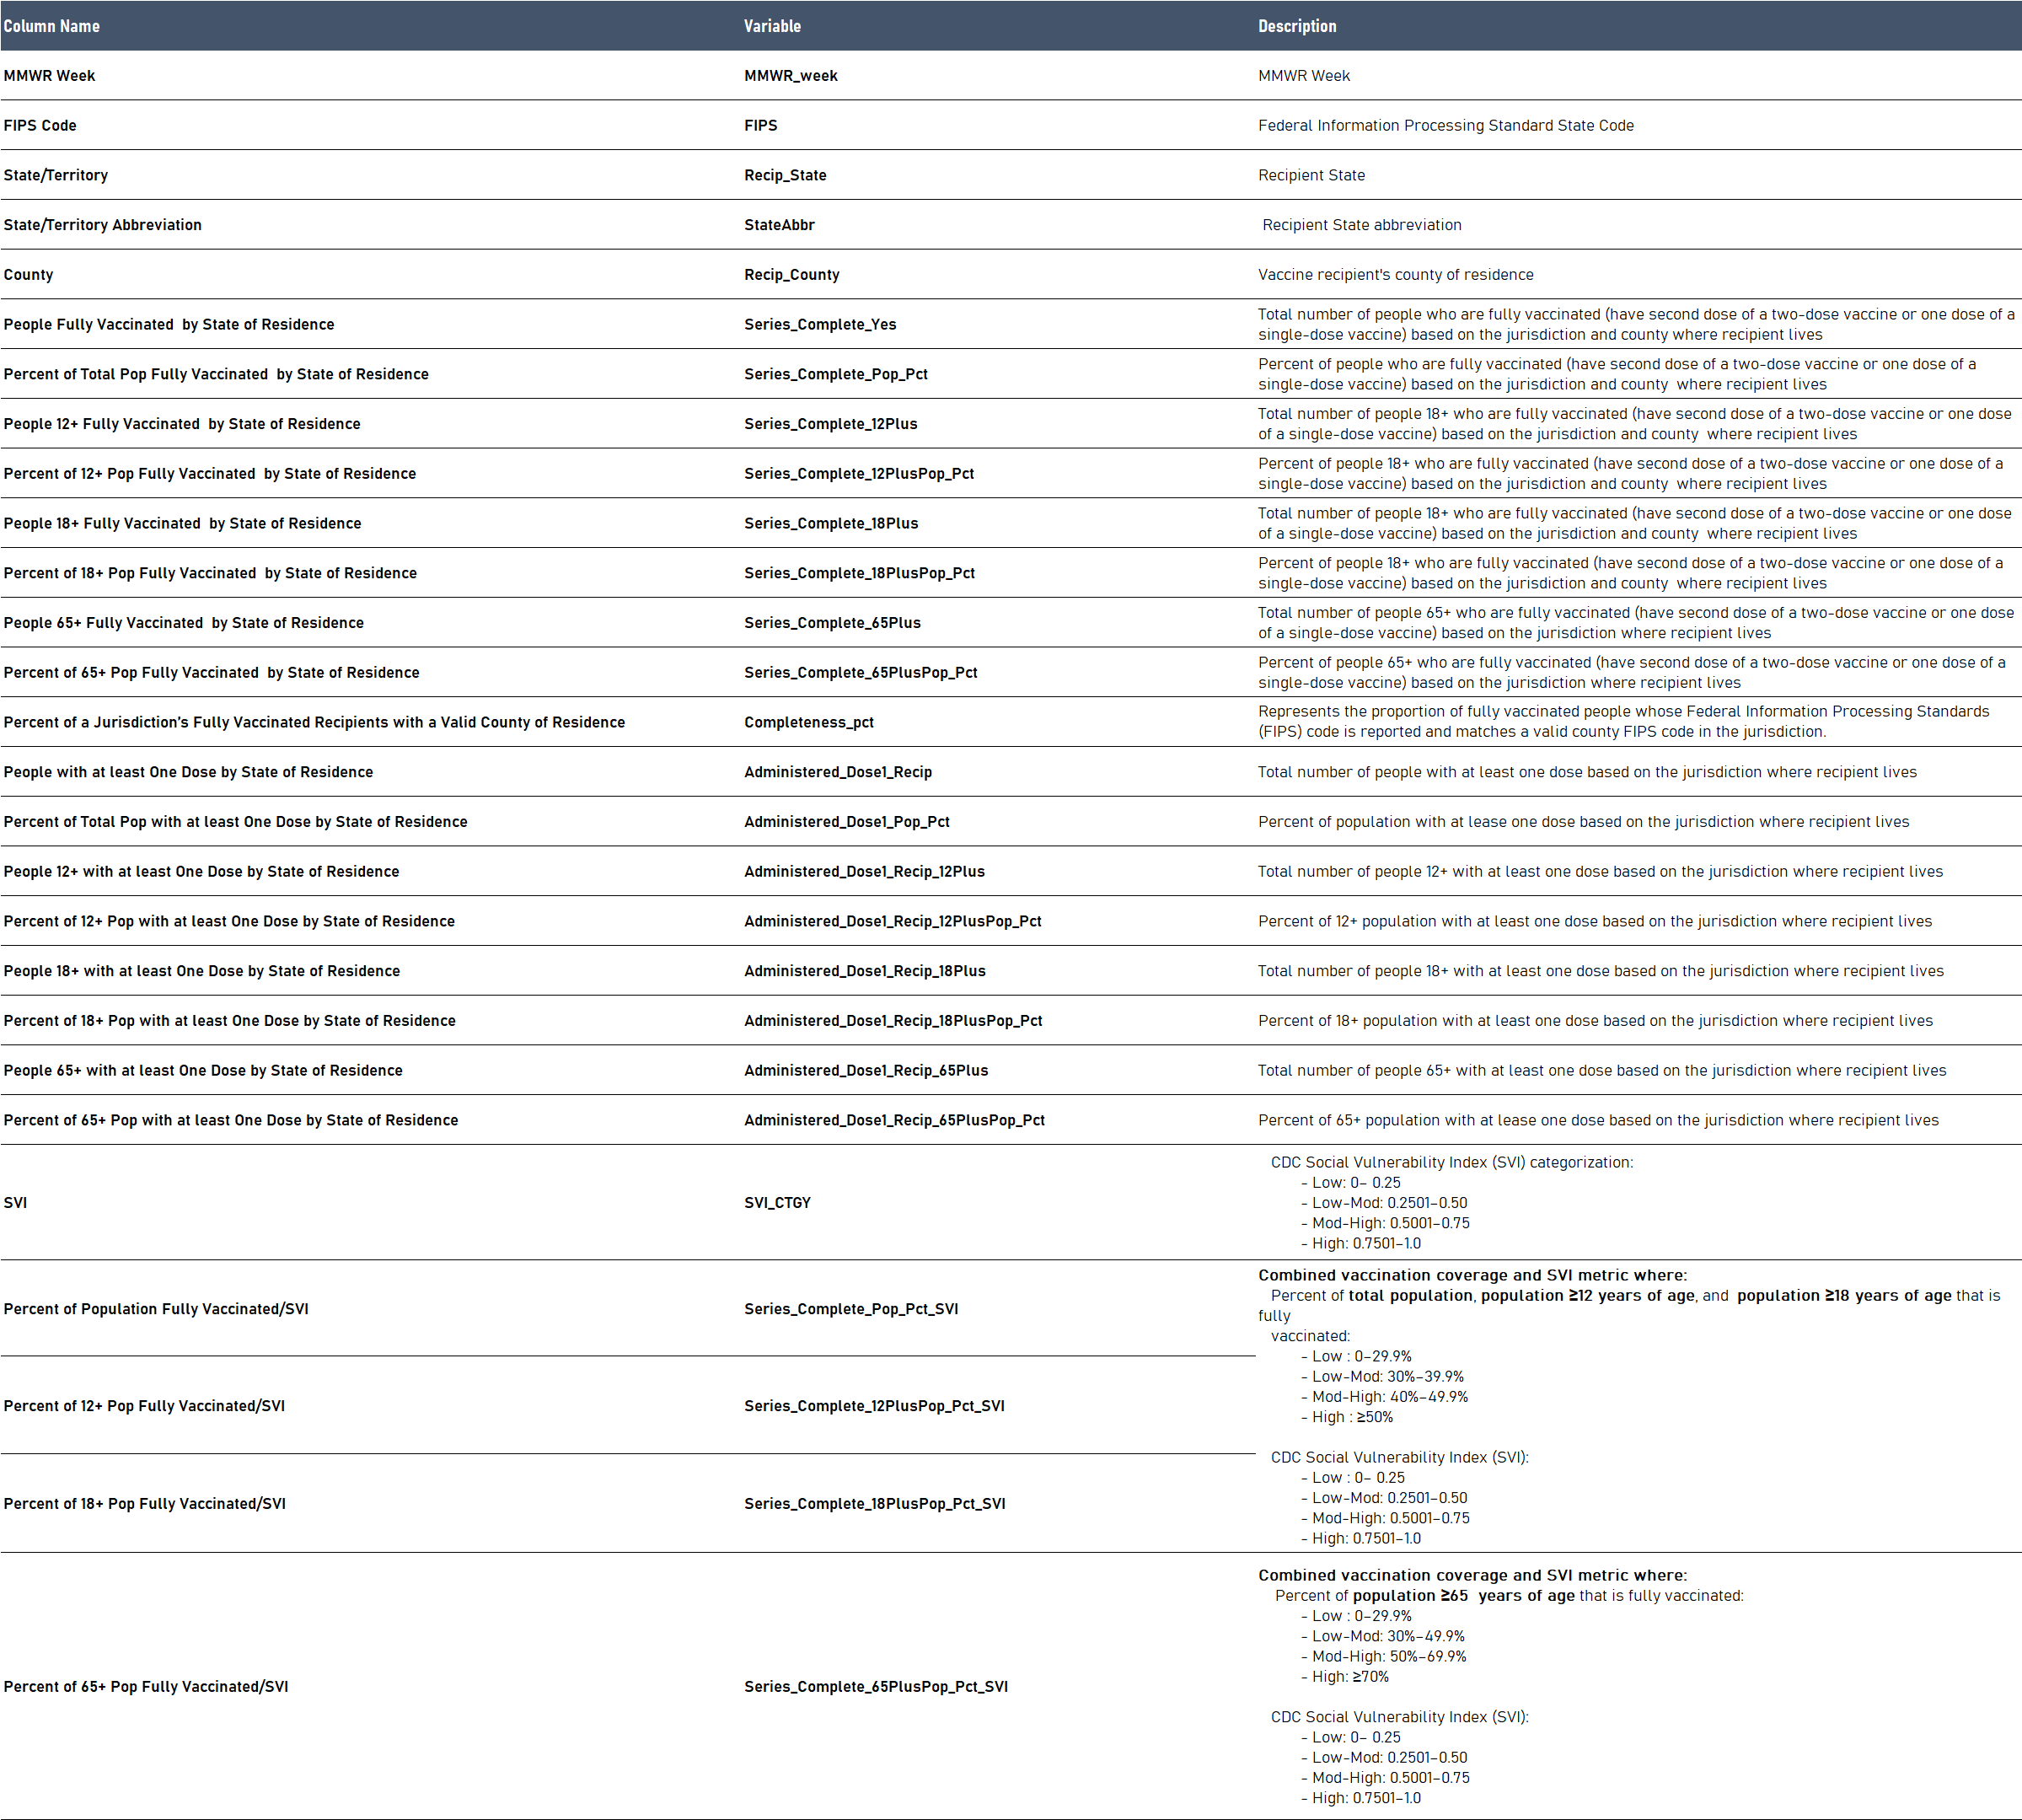

In [37]:
from IPython.display import Image
         
Image(filename="C:/Users/abdin/Downloads/covid_dict.png", width='1500')


# Importing Required Libraries

In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 22, 10
import re



# Loading Our Data
### The date variable is used for indexing the dataset as an indication of when the vaccinations were administered.

In [8]:
covid_data = pd.read_csv('C:/Users/abdin/Downloads/COVID-19_Vaccinations_in_the_United_States_County.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)


## Exploratory Data Analyses
### The Covid-19 vaccinations dataset content is examined to get a general idea about the vaccinations across many demographics. Let's take a look at a few lines of our dataset.


In [12]:
covid_data.head() # check the first 5 rows

,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,...,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-11,13095,32,Dougherty County,GA,15.2,13401,13401.0,18.1,12517,18.6,...,0.0,NaN,0.0,NaN,0.0,High,Low VC/High SVI,Low VC/High SVI,Low VC/High SVI,Low VC/High SVI
2021-08-11,08027,32,Custer County,CO,39.4,1995,1995.0,43.4,1979,45.3,...,46.8,2127.0,48.7,1158.0,69.2,Low,Low-Mod VC/Low SVI,Mod-High VC/Low SVI,Mod-High VC/Low SVI,Mod-High VC/Low SVI
2021-08-11,05127,32,Scott County,AR,30.2,3102,3099.0,35.4,3028,38.2,...,45.5,3849.0,48.6,1432.0,64.9,High,Low-Mod VC/High SVI,Low-Mod VC/High SVI,Low-Mod VC/High SVI,Mod-High VC/High SVI
2021-08-11,16071,32,Oneida County,ID,30.2,1367,NaN,NaN,1366,42.1,...,NaN,1540.0,47.4,666.0,71.9,Low-Mod,Low-Mod VC/Low-Mod SVI,Low-Mod VC/Low-Mod SVI,Mod-High VC/Low-Mod SVI,Mod-High VC/Low-Mod SVI
2021-08-11,28037,32,Franklin County,MS,32.2,2483,2483.0,37.5,2446,41.0,...,45.0,2848.0,47.7,1080.0,67.4,Mod-High,Low-Mod VC/Mod-High SVI,Low-Mod VC/Mod-High SVI,Mod-High VC/Mod-High SVI,Mod-High VC/Mod-High SVI


In [14]:
covid_data.tail() # check the last five rows

,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,...,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-13,53003,51,Asotin County,WA,0.0,0,0.0,0.0,0,0.0,...,0.0,NaN,0.0,NaN,0.0,Low-Mod,NaN,NaN,NaN,NaN
2020-12-13,46127,51,Union County,SD,0.0,0,0.0,0.0,0,0.0,...,0.0,NaN,0.0,NaN,0.0,Low,NaN,NaN,NaN,NaN
2020-12-13,48317,51,Martin County,TX,0.0,0,0.0,0.0,0,0.0,...,0.0,NaN,0.0,NaN,0.0,Low-Mod,NaN,NaN,NaN,NaN
2020-12-13,6019,51,Fresno County,CA,0.0,0,0.0,0.0,0,0.0,...,0.0,NaN,0.0,NaN,0.0,High,NaN,NaN,NaN,NaN
2020-12-13,38055,51,McLean County,ND,0.0,0,0.0,0.0,0,0.0,...,0.0,NaN,0.0,NaN,0.0,Low,NaN,NaN,NaN,NaN


In [106]:
covid_data.shape

(794002, 26)

## Statistical Summaries
### Here the dataset's features' stats are shown. 

In [616]:
covid_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FIPS,794002,6450,UNK,13794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMWR_week,794002,NaN,NaN,NaN,19.3788,13.2949,1,9,18,26,53
Recip_County,794002,1960,Unknown County,13794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recip_State,794002,60,TX,61468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series_Complete_Pop_Pct,794002,NaN,NaN,NaN,16.5767,16.616,0,0,12.1,29.6,99.9
Series_Complete_Yes,794002,NaN,NaN,NaN,22014.2,104710,0,96,2279,9940,5.48756e+06
Series_Complete_12Plus,783115,NaN,NaN,NaN,22202.9,105288,0,93,2289,10017,5.47598e+06
Series_Complete_12PlusPop_Pct,783115,NaN,NaN,NaN,19.2666,19.2961,0,0,13.9,34.6,100
Series_Complete_18Plus,794002,NaN,NaN,NaN,21419.7,100819,0,95,2264,9809,5.13747e+06
Series_Complete_18PlusPop_Pct,794002,NaN,NaN,NaN,20.7791,20.5159,0,0,15.4,37.6,99.9


## Names of The Features in The Datasets

In [618]:
covid_data.columns.values

array(['FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Series_Complete_Yes',
       'Series_Complete_12Plus', 'Series_Complete_12PlusPop_Pct',
       'Series_Complete_18Plus', 'Series_Complete_18PlusPop_Pct',
       'Series_Complete_65Plus', 'Series_Complete_65PlusPop_Pct',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'SVI_CTGY',
       'Series_Complete_Pop_Pct_SVI', 'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Complete_18PlusPop_Pct_SVI',
       'Series_Complete_65PlusPop_Pct_SVI'], dtype=object)

## Distributions of The Features in The Dataset
The below graphs show how each feature in our dataset is represented.

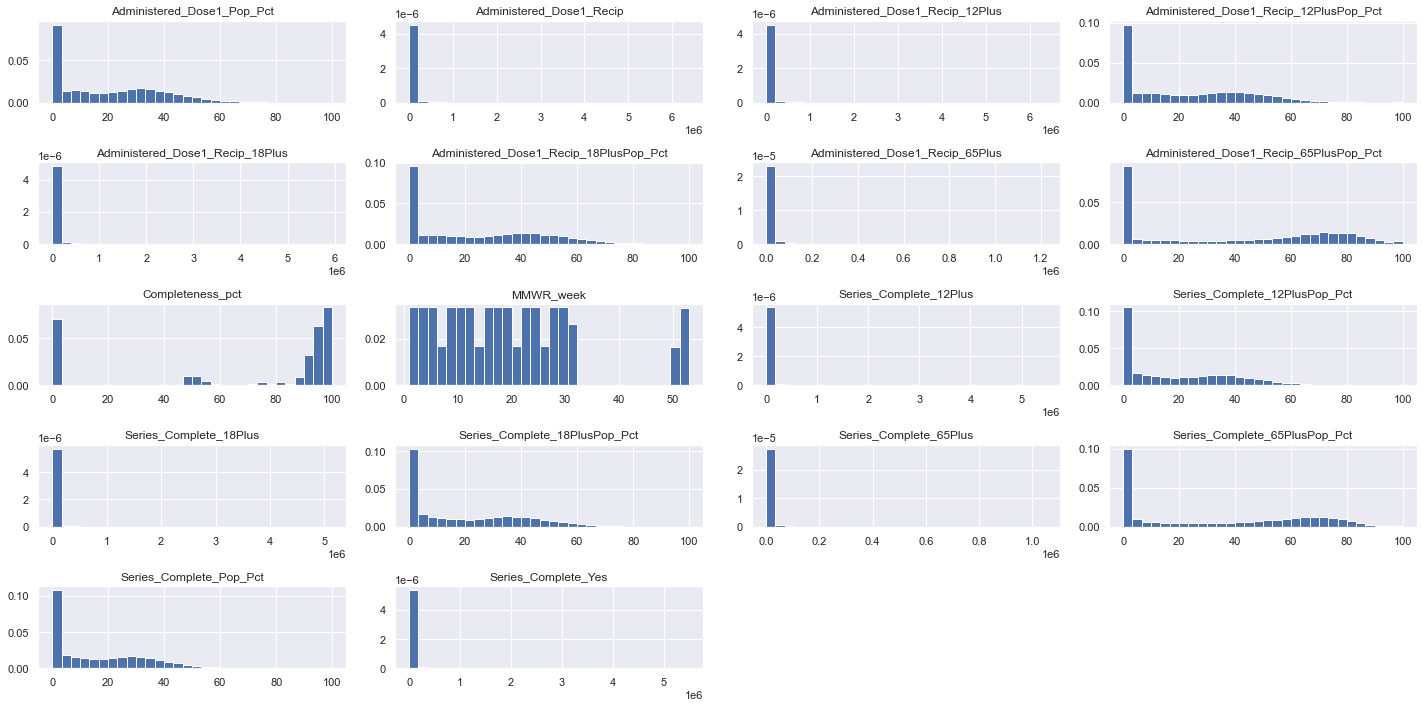

In [621]:
covid_data.hist(bins=30, figsize=(20,10), density=True)
plt.tight_layout()
plt.show()

## Number of US States in the Datasets
### Exploring the number of the states that recorded the vaccinations number.

In [15]:
states =sorted(covid_data['Recip_State'].unique())
print('States Abbreviated names\n',*states) # Prints list one line
print('\nNumber of States: ',len(states))



States Abbreviated names
 AK AL AR AS AZ CA CO CT DC DE FL FM GA GU HI IA ID IL IN KS KY LA MA MD ME MH MI MN MO MP MS MT NC ND NE NH NJ NM NV NY OH OK OR PA PR PW RI SC SD TN TX UNK UT VA VI VT WA WI WV WY

Number of States:  60


The number of states exceeds that of actual US states which is 50 and what is in the dataset is 60. Further exploration is needed to verify if US territories are included.

After digging deeper into the dataset, it is indeed that the US territories are part of the dataset. In the following steps, actions will be taken scale down the number of states so that our dataset is error-free and less complicated in terms of buildng our predictive model. 

In [59]:
# terri = ['UNK','PW','VI','FM','AS', 'PR','GU','MP','MH']
# covid_data = covid_data[covid_data.Recip_State.isin(terri)==False]
# covid_data.shape


## Missing Values Count
Knowing the variables with missing values early on is a good idea to understand the problems that the dataset may have in order to take appropriate actions to rectify the issues.

In [16]:
covid_data.isna().sum()

FIPS                                           0
MMWR_week                                      0
Recip_County                                   0
Recip_State                                    0
Series_Complete_Pop_Pct                        0
Series_Complete_Yes                            0
Series_Complete_12Plus                     10887
Series_Complete_12PlusPop_Pct              10887
Series_Complete_18Plus                         0
Series_Complete_18PlusPop_Pct                  0
Series_Complete_65Plus                         0
Series_Complete_65PlusPop_Pct                  0
Completeness_pct                               0
Administered_Dose1_Recip                  198540
Administered_Dose1_Pop_Pct                     0
Administered_Dose1_Recip_12Plus           226616
Administered_Dose1_Recip_12PlusPop_Pct     10887
Administered_Dose1_Recip_18Plus           217754
Administered_Dose1_Recip_18PlusPop_Pct         0
Administered_Dose1_Recip_65Plus           216729
Administered_Dose1_R

## Visualizing The Missing Values

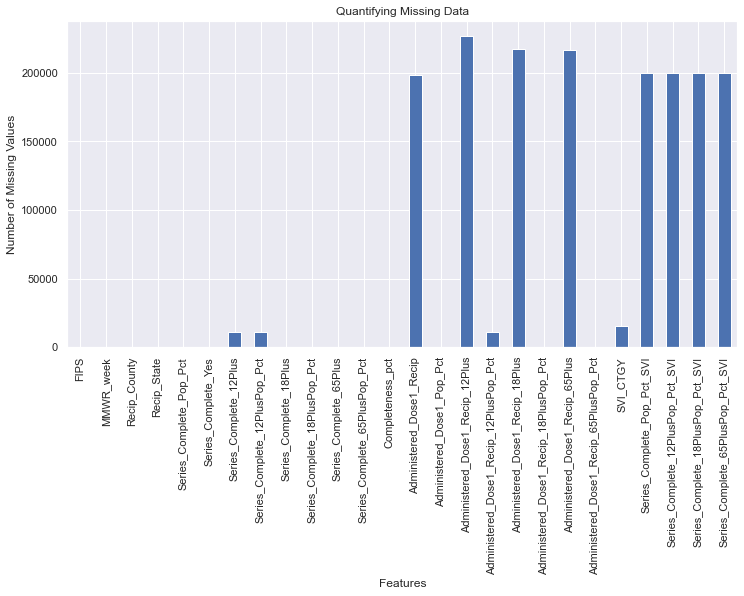

In [17]:
covid_data.isna().sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of Missing Values')
plt.xlabel('Features')
plt.title('Quantifying Missing Data')
plt.show()

# Cleaning the Dataset
## Exploring and Dropping data points
Not all features in our dataset are important in evaluating our predictive model and therefore they necessitate to be dropped. Removing features with less importance improves the quality of the dataset and performance of our model.

###  Only 50 US states Needed for the Model
Even though our dataset includes all 50 US states and its territories, in order to simplify our predictive model, it is better to drop the US territories as there are no sufficient data available. An example is illustrated below with a 'Recip_State' called 'PW' which hold no values and justifies the exclusion for our model building.

### Replacing Missing Values with Zeroes
One of the methods to employed in cleaning our dataset is by replacing the missing values zeros.

In [18]:
# Converting integers to floats and changing missing values with zeros
covid_data_cleaned = covid_data.fillna(0)
covid_data_cleaned.head()

,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,...,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-11,13095,32,Dougherty County,GA,15.2,13401,13401.0,18.1,12517,18.6,...,0.0,0.0,0.0,0.0,0.0,High,Low VC/High SVI,Low VC/High SVI,Low VC/High SVI,Low VC/High SVI
2021-08-11,08027,32,Custer County,CO,39.4,1995,1995.0,43.4,1979,45.3,...,46.8,2127.0,48.7,1158.0,69.2,Low,Low-Mod VC/Low SVI,Mod-High VC/Low SVI,Mod-High VC/Low SVI,Mod-High VC/Low SVI
2021-08-11,05127,32,Scott County,AR,30.2,3102,3099.0,35.4,3028,38.2,...,45.5,3849.0,48.6,1432.0,64.9,High,Low-Mod VC/High SVI,Low-Mod VC/High SVI,Low-Mod VC/High SVI,Mod-High VC/High SVI
2021-08-11,16071,32,Oneida County,ID,30.2,1367,0.0,0.0,1366,42.1,...,0.0,1540.0,47.4,666.0,71.9,Low-Mod,Low-Mod VC/Low-Mod SVI,Low-Mod VC/Low-Mod SVI,Mod-High VC/Low-Mod SVI,Mod-High VC/Low-Mod SVI
2021-08-11,28037,32,Franklin County,MS,32.2,2483,2483.0,37.5,2446,41.0,...,45.0,2848.0,47.7,1080.0,67.4,Mod-High,Low-Mod VC/Mod-High SVI,Low-Mod VC/Mod-High SVI,Mod-High VC/Mod-High SVI,Mod-High VC/Mod-High SVI


In [124]:
# covid_data_cleaned[covid_data_cleaned['Recip_State']=='PW']

## Drop US Territories

In [42]:
US_terri = ['UNK','PW','VI','FM','AS', 'PR','GU','MP','MH','DD2','LTC','US']
covid_data_cleaned = covid_data_cleaned[covid_data_cleaned.Recip_State.isin(US_terri)==False]
covid_data_cleaned.shape

(772057, 26)

In [156]:
covid_data_cleaned['Recip_State'].unique()

array(['GA', 'CO', 'AR', 'ID', 'MS', 'KY', 'OK', 'MI', 'OR', 'WV', 'NC',
       'TN', 'LA', 'AK', 'PA', 'NJ', 'SD', 'OH', 'WI', 'FL', 'MT', 'ND',
       'IA', 'TX', 'NE', 'IL', 'VA', 'WA', 'MN', 'MO', 'SC', 'MA', 'VT',
       'AL', 'ME', 'IN', 'NM', 'MD', 'KS', 'NY', 'WY', 'UT', 'CA', 'AZ',
       'CT', 'HI', 'NV', 'NH', 'DE', 'RI', 'DC'], dtype=object)

In [157]:
covid_data_cleaned['Recip_State'].unique().size

51

In [22]:
len(covid_data_cleaned.columns)

26

In [125]:
covid_data_cleaned[covid_data_cleaned['Recip_State'] == 'HI'].size

31460

In [127]:
covid_data_cleaned[covid_data_cleaned['Recip_State'] == 'TX'].size

1598168

In [77]:
# outlier_states = ['HI', 'TX']
# covid_data_cleaned = covid_data_cleaned[covid_data_cleaned['Recip_State'].isin(outlier_states)==False]

In [26]:
covid_data_cleaned.Recip_State.unique().size

51

In [43]:
covid_data_cleaned.isna().sum()

FIPS                                      0
MMWR_week                                 0
Recip_County                              0
Recip_State                               0
Series_Complete_Pop_Pct                   0
Series_Complete_Yes                       0
Series_Complete_12Plus                    0
Series_Complete_12PlusPop_Pct             0
Series_Complete_18Plus                    0
Series_Complete_18PlusPop_Pct             0
Series_Complete_65Plus                    0
Series_Complete_65PlusPop_Pct             0
Completeness_pct                          0
Administered_Dose1_Recip                  0
Administered_Dose1_Pop_Pct                0
Administered_Dose1_Recip_12Plus           0
Administered_Dose1_Recip_12PlusPop_Pct    0
Administered_Dose1_Recip_18Plus           0
Administered_Dose1_Recip_18PlusPop_Pct    0
Administered_Dose1_Recip_65Plus           0
Administered_Dose1_Recip_65PlusPop_Pct    0
SVI_CTGY                                  0
Series_Complete_Pop_Pct_SVI     

### Check Visually if this missing values are removed

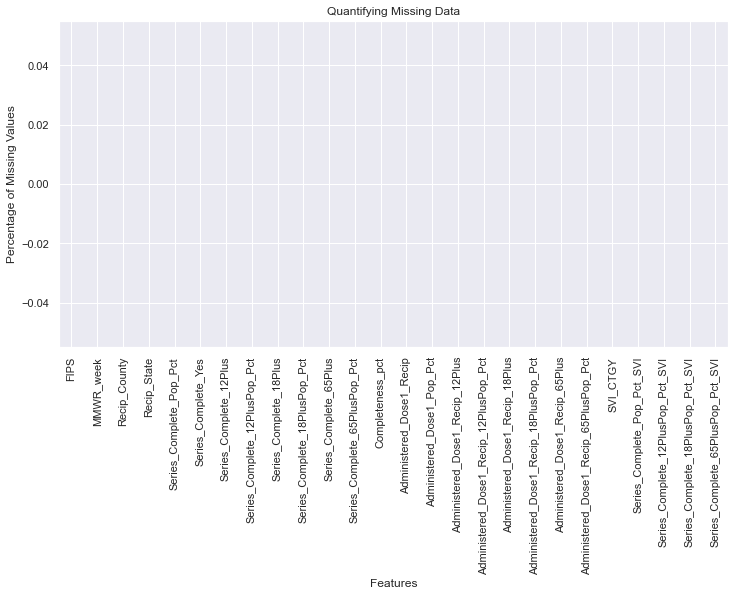

In [44]:
covid_data_cleaned.isna().sum().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Quantifying Missing Data')
plt.show()

In [128]:
# albama_counties_cd= covid_data_cleaned[covid_data_cleaned['Recip_State'].str.contains('AL')]
# albama_counties_cd.tail(20)

In [103]:
def indicies_of_outliers(x):
    IQR = covid_data_cleaned.quantile(q=0.75) - covid_data_cleaned.quantile(q=0.25)
    lower_bound = covid_data_cleaned.quantile(q=0.25)
    upper_bound = covid_data_cleaned.quantile(q=0.75)
    
    outlier = covid_data_cleaned[(covid_data_cleaned>(upper_bound + 1.5*IQR) ) | (vaccinated_group<(lower_bound - 1.5*IQR) )].count(axis=1).sort_values(axis=0, ascending=False, inplace=False)
    return outlier

outliers =indicies_of_outliers(covid_data_cleaned)
outliers.count()

772057

In [ ]:
color = sns.color_palette()
group = vaccinated_group.groupby(["State"])["Series_Complete_Yes"].aggregate("max").reset_index()
plt.figure(figsize=(14,8))
sns.pointplot(group['State'].values, group['Series_Complete_Yes'].values, alpha=0.8, color=color[3])
plt.ylabel('Max rate', fontsize=12,)
plt.xlabel('States', fontsize=15)
plt.title("Fully Vaccinated Number by States", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# outliers.plot(kind='barh')
# plt.title('Distribution of Outliers')
# plt.show()

## Feauture Selection
Since not all the variables in the dataset have equal importance when building a machine learning model, it is better to select the variables that are most appropriate for the task at hand. The legal basic employment age in the United States is 16 years and above at a federal level(wikipedia). To reduce the number of variables in our columns is a reasonable approach so that we can try to correlate the unemployment and the vaccinate rates via stastical methods. Variables for the population lower than 18 years old must be excluded to avoid complexities with our predictive model.

In [48]:
vaccinated_group = covid_data_cleaned[['Recip_State','Series_Complete_Yes',
       'Series_Complete_18Plus', 'Series_Complete_65Plus']]



In [49]:
vaccinated_group.rename(columns={'Recip_State':'State'}, inplace=True)
vaccinated_group.head()

,State,Series_Complete_Yes,Series_Complete_18Plus,Series_Complete_65Plus
Date,,,,
2021-08-11,GA,13401,12517,2322
2021-08-11,CO,1995,1979,1106
2021-08-11,AR,3102,3028,1236
2021-08-11,ID,1367,1366,632
2021-08-11,MS,2483,2446,1000


## Vaccination Completion Number By States
The line plot below shows the number  of completed vaccinations across the country.

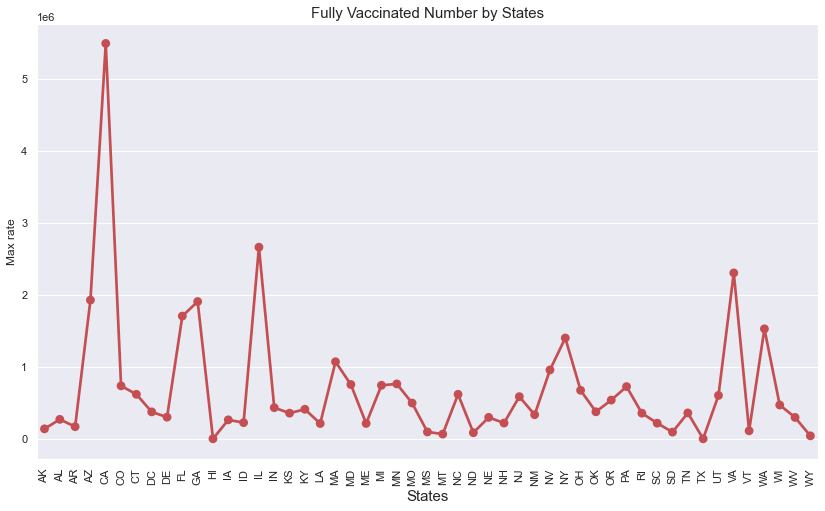

In [35]:
color = sns.color_palette()
group = vaccinated_group.groupby(["State"])["Series_Complete_Yes"].aggregate("max").reset_index()
plt.figure(figsize=(14,8))
sns.pointplot(group['State'].values, group['Series_Complete_Yes'].values, alpha=0.8, color=color[3])
plt.ylabel('Max rate', fontsize=12,)
plt.xlabel('States', fontsize=15)
plt.title("Fully Vaccinated Number by States", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## Vaccine Doses Administration Timeline
The graph below illustrates the number of vaccine series completed by individuals across different age group which indicates an upward trend from the begining up to now.

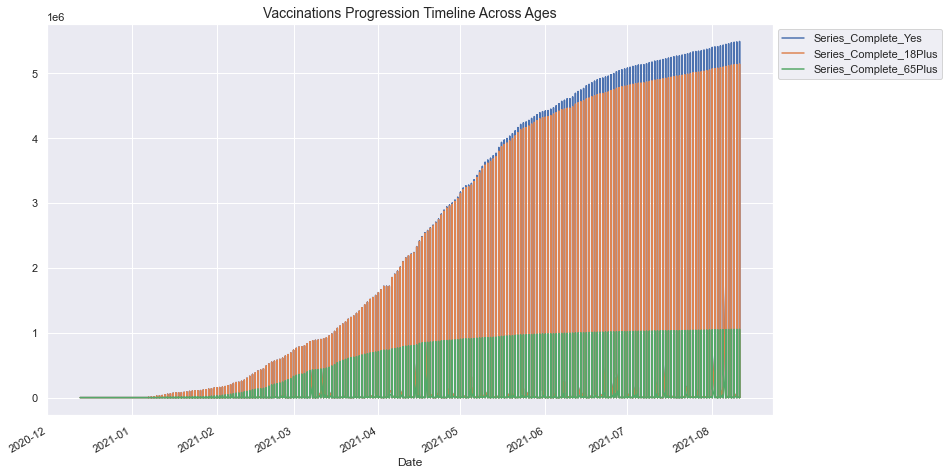

In [36]:
vaccinated_group.plot(figsize=(13,8)).autoscale()
plt.title('Vaccinations Progression Timeline Across Ages',fontsize=14)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

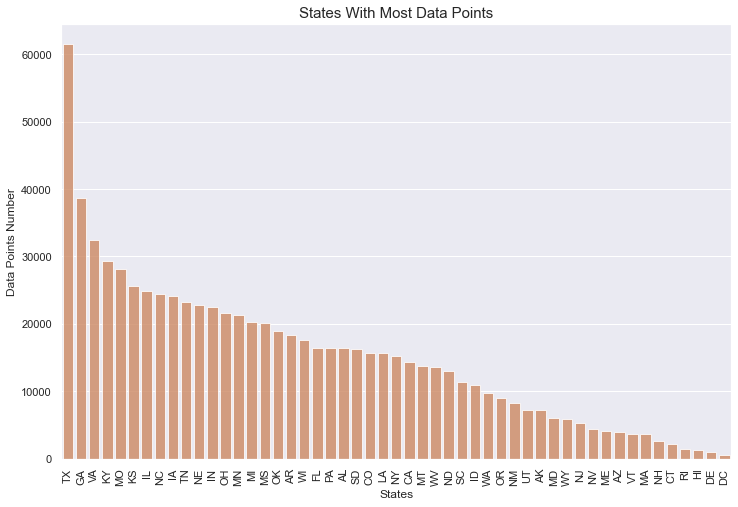

In [158]:
#Let us visualize how many times a state appeared in our dataset
color = sns.color_palette()
cnt_st = vaccinated_group.State.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_st.index, cnt_st.values, alpha=0.8, color=color[1])
plt.ylabel('Data Points Number', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('States With Most Data Points', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [665]:
covid_data.shape

(794002, 26)

## Univariate Time Series Analysis

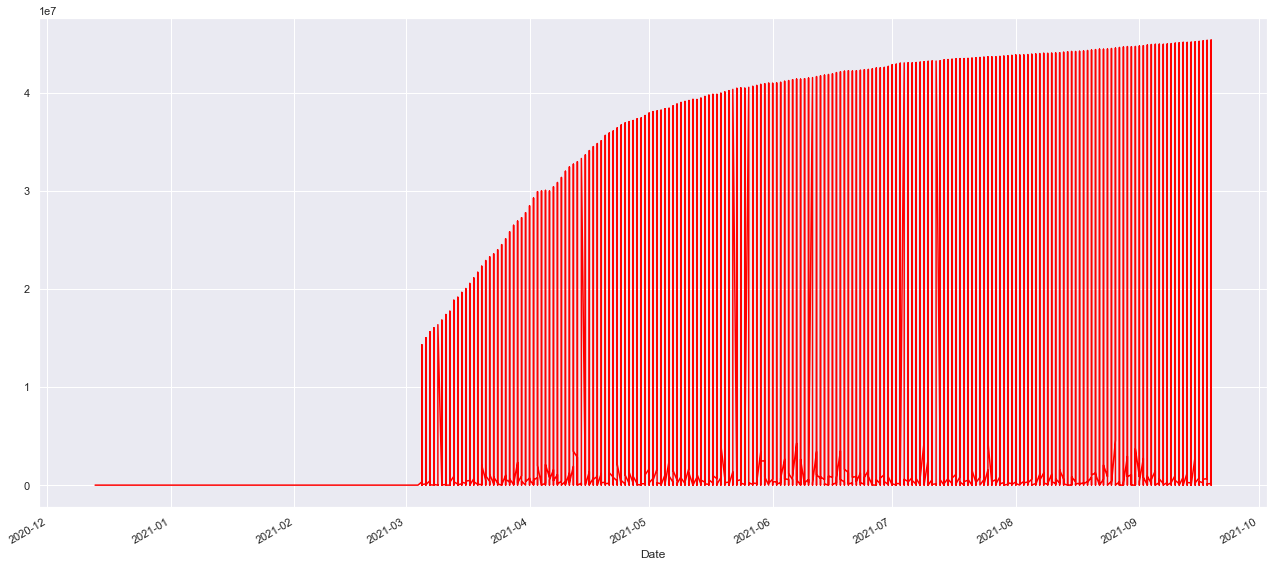

In [486]:
covid_data['Series_Complete_65Plus'].plot( color='red')
plt.show()

In [50]:
vaccinated_group.groupby('State').max().head(5)


,Series_Complete_Yes,Series_Complete_18Plus,Series_Complete_65Plus
State,,,
AK,137828,130363,28339
AL,269671,259854,84453
AR,167785,157649,45432
AZ,1925129,1821374,509010
CA,5487560,5137474,1050816


## Resampling Method
Resampling is a method of changing the frequency of time series data points. In our data, 
the timeline of the vaccinations is our time series and therefore we can use resample methods to check the distribution of vaccines over different times.
For example, we can see the average vaccines administered on a monthly basis or weekly or yearly. 
Since the dataset for the vaccinations is large, resampling gives us a manageable way of building the model we need.

In [51]:
monthly_doses = vaccinated_group.resample('M').mean()
monthly_doses

,Series_Complete_Yes,Series_Complete_18Plus,Series_Complete_65Plus
Date,,,
2020-12-31,0.757360,0.755838,0.083719
2021-01-31,539.867975,539.508042,67.566179
2021-02-28,4041.316414,4037.519385,1482.100920
2021-03-31,11205.578785,11192.692452,5786.409185
2021-04-30,22527.670939,22458.132727,9831.426449
2021-05-31,34651.377766,34243.477482,11443.684455
2021-06-30,41515.148240,40223.518813,12069.530638
2021-07-31,45187.013991,43091.546679,12416.880238
2021-08-31,46663.710749,44303.670779,12577.985869


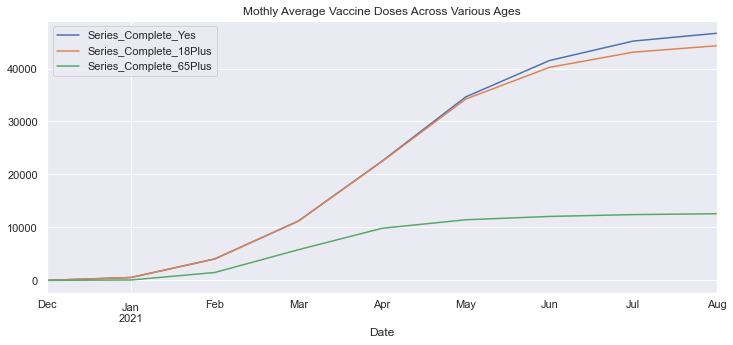

In [52]:
monthly_doses.plot(figsize=(12,5))
plt.title('Mothly Average Vaccine Doses Across Various Ages')
plt.show()

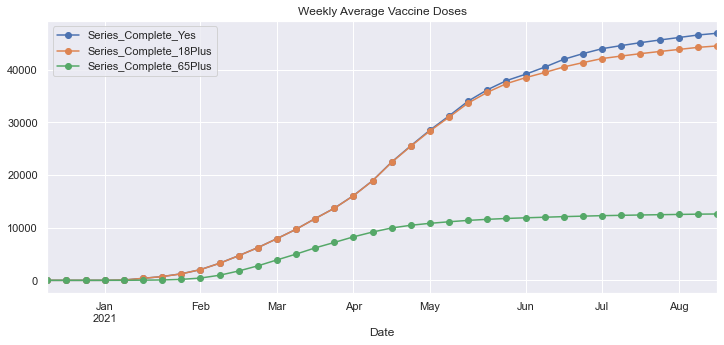

In [53]:
daily_dose = vaccinated_group.resample('W').mean().plot(style='-o', figsize=(12,5))
plt.title('Weekly Average Vaccine Doses')
plt.show()

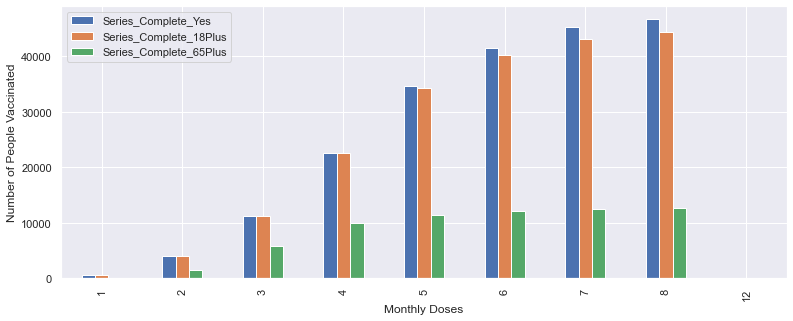

In [54]:
fig, axs = plt.subplots(figsize=(13,5))
vaccinated_group.groupby(vaccinated_group.index.month).mean().plot(kind='bar', ax=axs)
plt.xlabel('Monthly Doses')
plt.ylabel('Number of People Vaccinated')
plt.show()

In [107]:
# # Draw Plot
# def plot_df(vaccinated_group, x, y, title="", xlabel='Date', ylabel=total_vaccinated, dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:blue')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

# plot_df(vaccinated_group, x=vaccinated_group.index, y=vaccinated_group.Series_Complete_Pop_Pct, title='Monthly Vaccines Administration From December,2020 To Present.', ylabel='Percentage') 

## Resampling our data for managable prediction
We use *.resample()* method to convert our timeline from individual days to months. Since there are 9 months when the data collection for the Covid-19 vaccine started, we take the average of each month's vaccination number as our data points for our predictive model so that we have clear and managable set points and therefore easier execution time by using a resampling method without the resource consuming original data.

In [757]:
vaccinated_group.resample('M').mean()

,Series_Complete_Yes,Series_Complete_18Plus,Series_Complete_65Plus
Date,,,
2020-12-31,0.757360,0.755838,0.083719
2021-01-31,539.867975,539.508042,67.566179
2021-02-28,4041.316414,4037.519385,1482.100920
2021-03-31,11205.578785,11192.692452,5786.409185
2021-04-30,22527.670939,22458.132727,9831.426449
2021-05-31,34651.377766,34243.477482,11443.684455
2021-06-30,41515.148240,40223.518813,12069.530638
2021-07-31,45187.013991,43091.546679,12416.880238
2021-08-31,46663.710749,44303.670779,12577.985869


In [134]:
vaccinated_group[2:]


,State,Series_Complete_Yes,Series_Complete_18Plus,Series_Complete_65Plus
Date,,,,
2021-08-11,AR,3102,3028,1236
2021-08-11,ID,1367,1366,632
2021-08-11,MS,2483,2446,1000
2021-08-11,KY,2034,2010,856
2021-08-11,MS,76653,74411,23891
...,...,...,...,...
2020-12-13,WA,0,0,0
2020-12-13,SD,0,0,0
2020-12-13,TX,0,0,0


<AxesSubplot:xlabel='Date'>

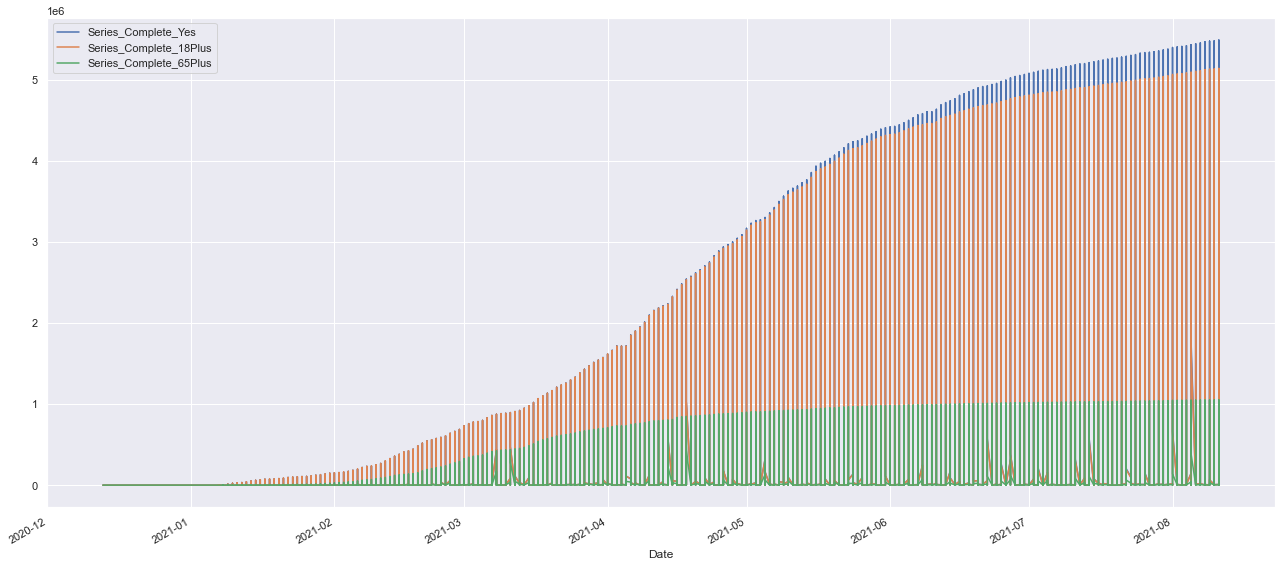

In [55]:
vaccinated_group.plot()

In [135]:
mean_vac = vaccinated_group.resample('M').mean()
average_vac= mean_vac[['Series_Complete_Yes', 'Series_Complete_18Plus']]


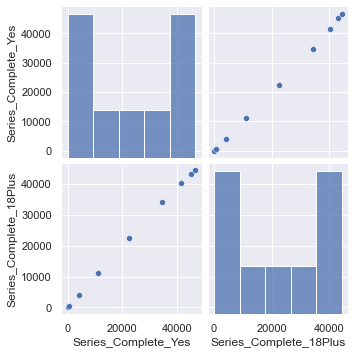

In [136]:
sns.pairplot(average_vac)

<AxesSubplot:xlabel='Date'>

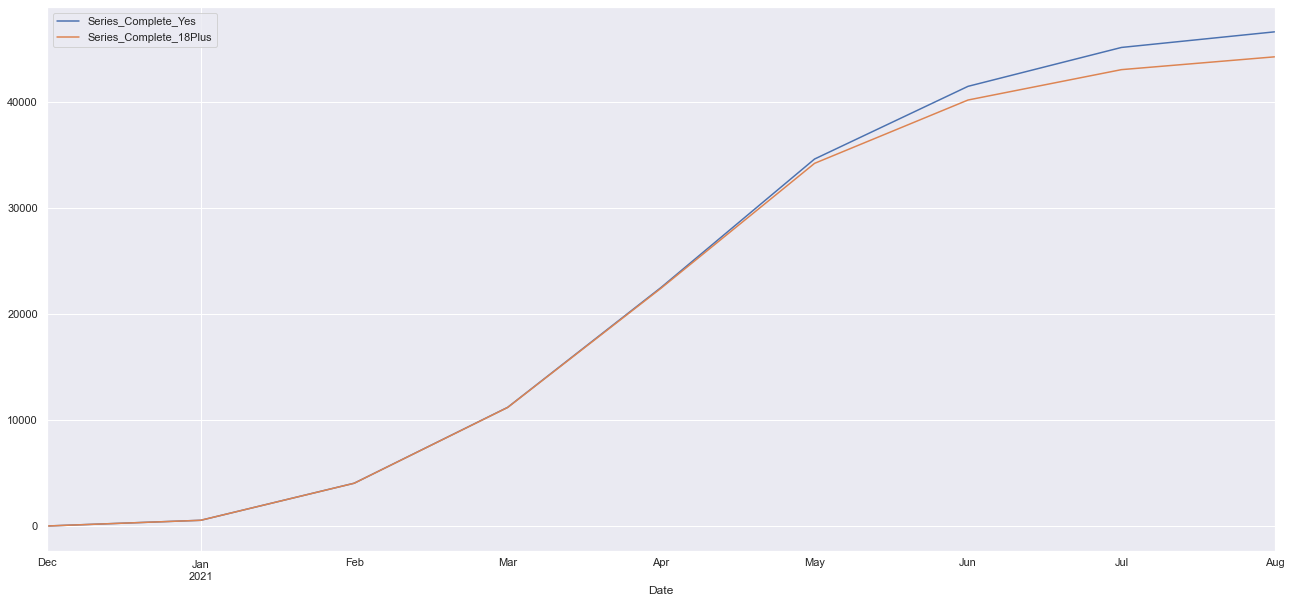

In [154]:
average_vac.plot()

In [155]:
unRate = pd.read_csv("C:/Users/abdin/Downloads/UNRATE.csv", header=0, index_col=0,
parse_dates=True, squeeze=True)
Rateun = pd.DataFrame(unRate)

<AxesSubplot:xlabel='Date'>

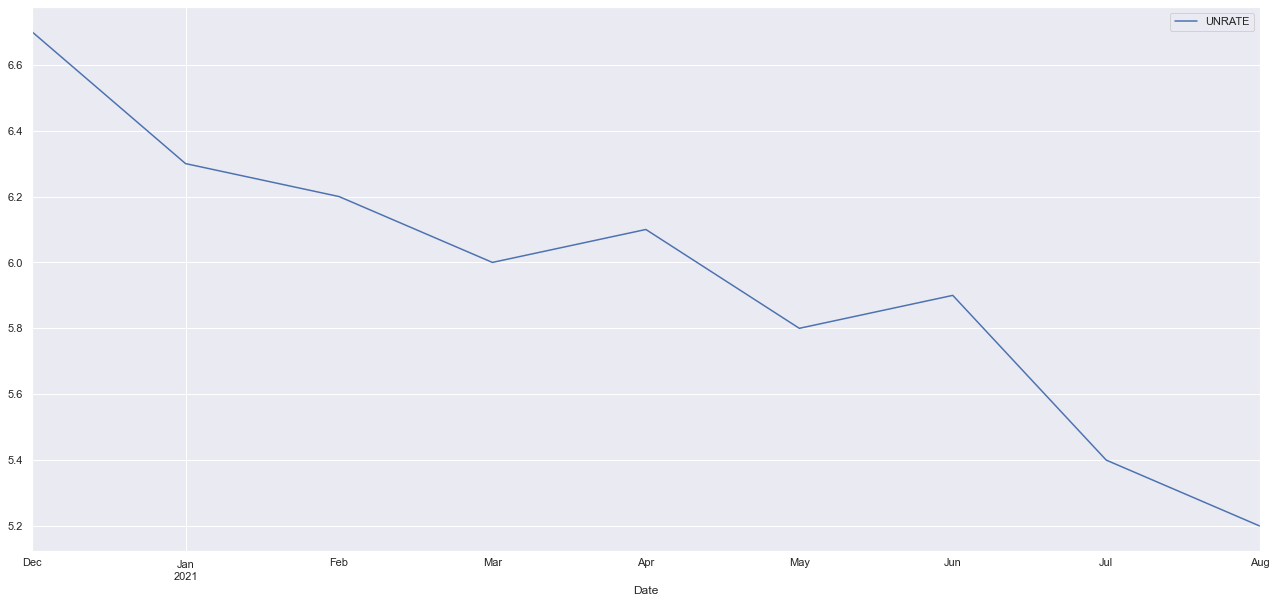

In [61]:
Rateun.plot()

In [62]:
Rateun

,UNRATE
Date,
2020-12-01,6.7
2021-01-01,6.3
2021-02-01,6.2
2021-03-01,6.0
2021-04-01,6.1
2021-05-01,5.8
2021-06-01,5.9
2021-07-01,5.4
2021-08-01,5.2


In [139]:
Rateun= Rateun.resample('M').mean()

In [140]:
data_comb = pd.concat([average_vac,Rateun], axis=1)

In [141]:
data_comb

,Series_Complete_Yes,Series_Complete_18Plus,UNRATE
Date,,,
2020-12-31,0.757360,0.755838,6.7
2021-01-31,539.867975,539.508042,6.3
2021-02-28,4041.316414,4037.519385,6.2
2021-03-31,11205.578785,11192.692452,6.0
2021-04-30,22527.670939,22458.132727,6.1
2021-05-31,34651.377766,34243.477482,5.8
2021-06-30,41515.148240,40223.518813,5.9
2021-07-31,45187.013991,43091.546679,5.4
2021-08-31,46663.710749,44303.670779,5.2


In [142]:
df = data_comb

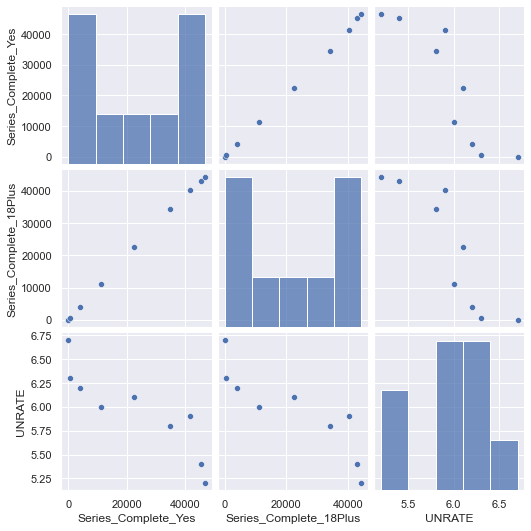

In [143]:
sns.pairplot(df)

In [144]:
df[[ 'Series_Complete_18Plus','UNRATE']].corr()

,Series_Complete_18Plus,UNRATE
Series_Complete_18Plus,1.000000,-0.879112
UNRATE,-0.879112,1.000000


In [145]:
df[['Series_Complete_18Plus','UNRATE']].cov()

,Series_Complete_18Plus,UNRATE
Series_Complete_18Plus,3.509998e+08,-7507.535991
UNRATE,-7.507536e+03,0.207778


<AxesSubplot:xlabel='Date'>

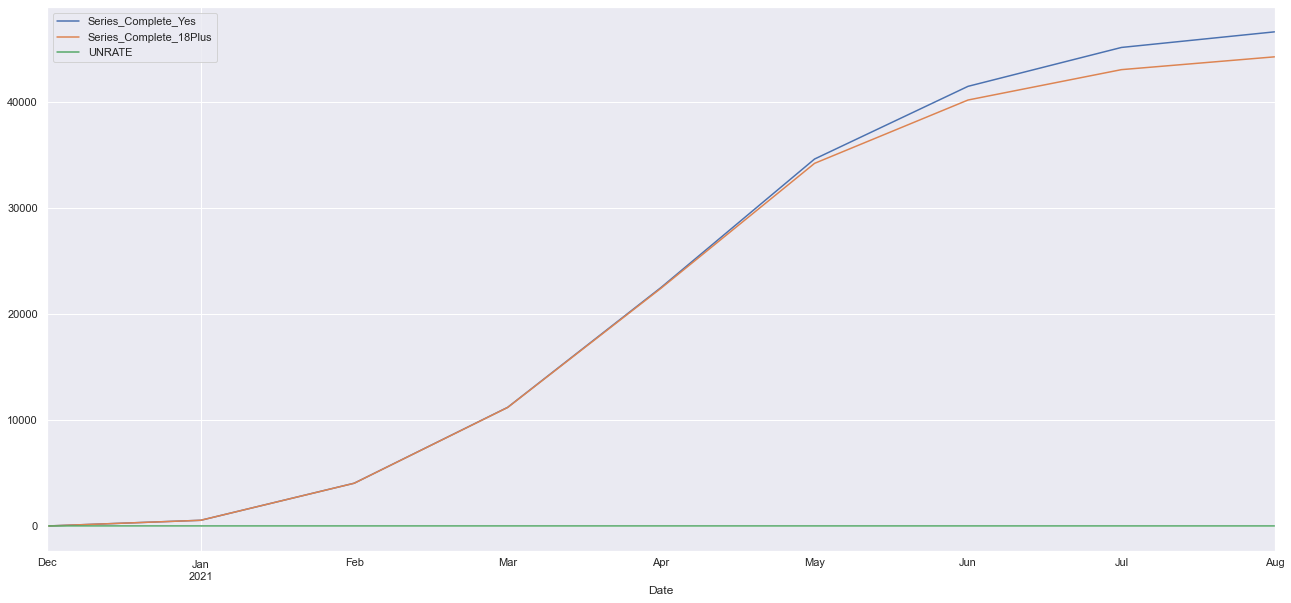

In [146]:
df.plot()

In [147]:
df.corr()

,Series_Complete_Yes,Series_Complete_18Plus,UNRATE
Series_Complete_Yes,1.000000,0.999670,-0.884769
Series_Complete_18Plus,0.999670,1.000000,-0.879112
UNRATE,-0.884769,-0.879112,1.000000


The *Series_Commplete_Yes* and *Series_Complete_18plus* features are highly correlated and therefore they are good candidates for our predictive model.

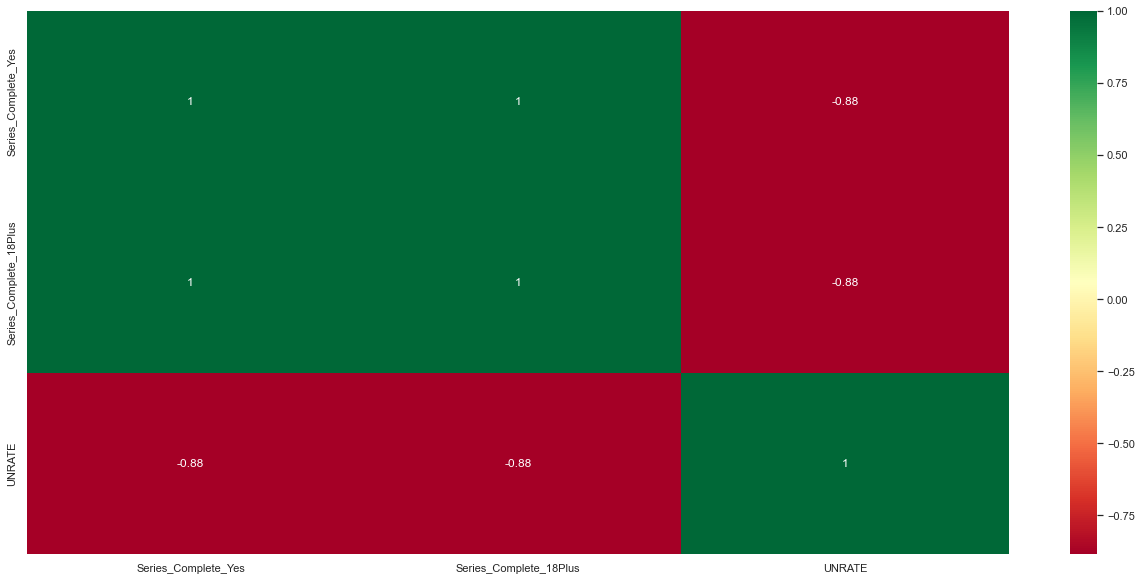

In [148]:
hm= sns.heatmap(df.corr(),annot=True, cmap="RdYlGn")

Text(0.5, 1.0, 'Covid-19 Vaccinations Vs Unemployment Rates')

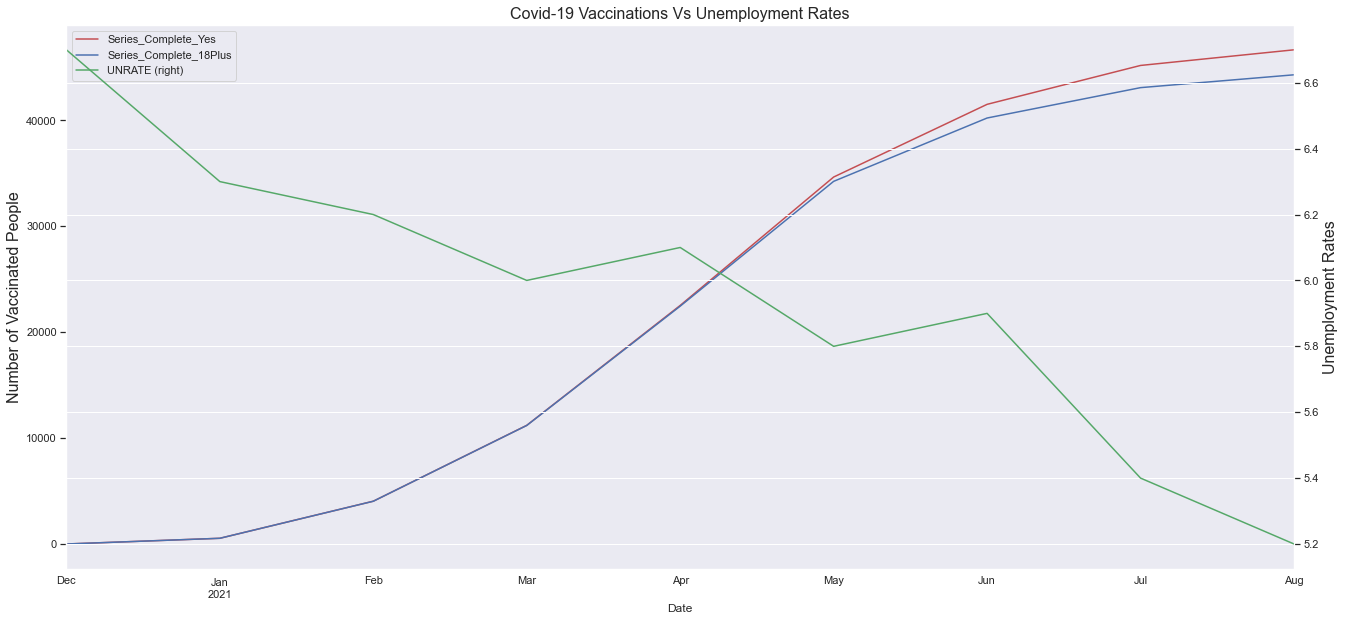

In [149]:
ax = df.plot(secondary_y=['UNRATE'], style=["r",'b','g'],);
ax.set_ylabel('Number of Vaccinated People', fontsize=16)
ax.right_ax.set_ylabel('Unemployment Rates', fontsize=16)
plt.title('Covid-19 Vaccinations Vs Unemployment Rates', fontsize=16)

## The Linear Regression Plot Using One Predictor Variable and Response Variable

<Figure size 1440x432 with 0 Axes>

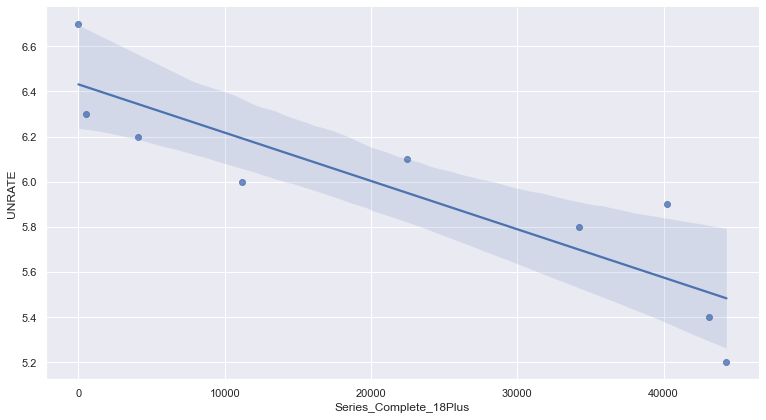

In [150]:
plt.figure(figsize=(20,6))
sns.lmplot('Series_Complete_18Plus','UNRATE', data=df,height=6, aspect=1.8)
plt.show()

## Model Creation, Training, Testing, and Making Prediction

In [151]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression


features = df.iloc[:,:-1]
labels = df["UNRATE"]

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2, random_state=42)
#scale the data (feature scaling)
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

# Using Linear Regression on the model
lr = LinearRegression()
clf = lr.fit(features_train,labels_train)

# Prediction
y_pred = clf.predict(features_test)
y_pred



array([5.41481586, 6.3939202 ])

## The Measure of Accuracy

In [153]:
from sklearn.metrics import r2_score
r2_score(labels_test, y_pred)

0.9776777449543759

In [79]:
print('MSE: ', mean_squared_error(labels_test, y_pred))

MSE:  0.004521263031773121


In [80]:
print('RMSE:', np.sqrt( mean_squared_error(labels_test, y_pred)))

RMSE: 0.06724033783208648


In [82]:
clf = LinearRegression()
clf.fit(features_train, labels_train)

print(clf.score(features_test, labels_test))


0.9776727751517377


In [83]:
clf.intercept_

5.985714285714287

In [84]:
clf.coef_

array([-3.33844661,  2.98160036])

In [85]:
df[::-1]

,Series_Complete_Yes,Series_Complete_18Plus,UNRATE
Date,,,
2021-08-31,46665.931081,44305.782273,5.2
2021-07-31,45187.013991,43091.546679,5.4
2021-06-30,41515.148240,40223.518813,5.9
2021-05-31,34651.377766,34243.477482,5.8
2021-04-30,22527.670939,22458.132727,6.1
2021-03-31,11205.578785,11192.692452,6.0
2021-02-28,4041.316414,4037.519385,6.2
2021-01-31,539.867975,539.508042,6.3
2020-12-31,0.757360,0.755838,6.7


In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [107]:
y= df["UNRATE"]
X = features
X = sm.add_constant(X)
X.head()

,const,Series_Complete_Yes,Series_Complete_18Plus
Date,,,
2020-12-31,1.0,0.757360,0.755838
2021-01-31,1.0,539.867975,539.508042
2021-02-28,1.0,4041.316414,4037.519385
2021-03-31,1.0,11205.578785,11192.692452
2021-04-30,1.0,22527.670939,22458.132727


In [108]:
linear_regression = smf.ols(formula='labels~features', data=df)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 labels   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     14.29
Date:                Tue, 28 Sep 2021   Prob (F-statistic):            0.00522
Time:                        10:31:33   Log-Likelihood:                 2.7118
No. Observations:                   9   AIC:                            0.5763
Df Residuals:                       6   BIC:                             1.168
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.3710      0.126     50.761      0.000       6.064       6.678
features[0]    -0.0002      0.000     -1.362      0.222      -0.001       0.000
features[1]     0.0002      0.000      1.228      0.265      -0.000       0.001
==============================================================================
Omnibus:                        1.968   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.130
Skew:                           0.814   Prob(JB):                        0.568
Kurtosis:                       2.399   Cond. No.                     7.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 UNRATE   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     14.29
Date:                Sun, 26 Sep 2021   Prob (F-statistic):            0.00522
Time:                        23:06:28   Log-Likelihood:                 2.7118
No. Observations:                   9   AIC:                            0.5763
Df Residuals:                       6   BIC:                             1.168
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.3710      0.126     50.761      0.000       6.064       6.678
Series_Complete_Yes       -0.0002      0.000     -1.362      0.222      -0.001       0.000
Series_Complete_18Plus     0.0002      0.000      1.228      0.265      -0.000       0.001
==============================================================================
Omnibus:                        1.968   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.130
Skew:                           0.814   Prob(JB):                        0.568
Kurtosis:                       2.399   Cond. No.                     7.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""